In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('/kaggle/input/phishing-website-detector/phishing.csv')
df

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [4]:
df.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [7]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your dataset is in a CSV file named 'students_data.csv'

# Assuming 'Target' is the target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Logistic Regression
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train, y_train)
et_predictions = et_classifier.predict(X_test)
et_accuracy = accuracy_score(y_test, et_predictions)
print("Extra Trees Accuracy:", et_accuracy)


# SVM Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


Random Forest Accuracy: 0.9696969696969697
Logistic Regression Accuracy: 0.9335142469470827
Extra Trees Accuracy: 0.9687924016282226
SVM Accuracy: 0.5585707824513795


In [9]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Assuming your dataset is in a CSV file named 'students_data.cs

# Define the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Extra Trees': ExtraTreesClassifier(),
    'Naive Bayes': GaussianNB()
}

# Set up k-fold stratified cross-validation
k_folds = 5  # You can adjust the number of folds
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f"Classifier: {clf_name}")
    accuracy_list = []
    classification_reports = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)

        classification_reports.append(classification_report(y_test, y_pred))

    # Display average accuracy and classification report
    avg_accuracy = sum(accuracy_list) / k_folds
    print(f"Average Accuracy: {avg_accuracy:.6f}")
    
    print("Average Classification Report:")
    for metric in classification_reports[0].split('\n')[:-1]:
        print(metric)
    print("\n" + "="*50 + "\n")


Classifier: Random Forest
Average Accuracy: 0.968518
Average Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       980
           1       0.97      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211


Classifier: Logistic Regression
Average Accuracy: 0.925728
Average Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.88      0.91       980
           1       0.91      0.95      0.93      1231

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211


Classifier: Extra Trees
Average Accuracy: 0.970690
Average Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.96

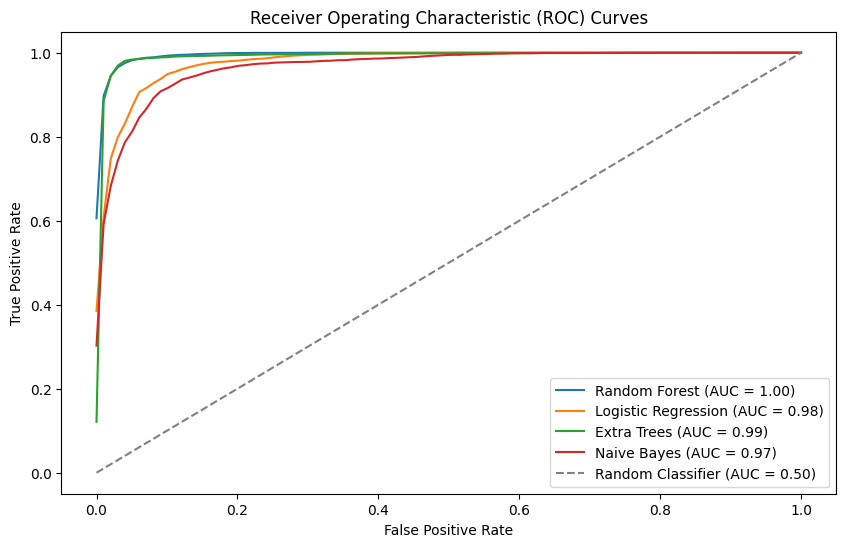

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Specify the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Extra Trees': ExtraTreesClassifier(),
    'Naive Bayes': GaussianNB()  # Note: SVM needs probability estimates for ROC curve
}

# Number of folds for stratified k-fold
num_folds = 5

# Initialize a plot for ROC curves
plt.figure(figsize=(10, 6))

# Perform stratified k-fold validation
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
    mean_fpr = np.linspace(0, 1, 100)
    tpr_sum = 0
    auc_sum = 0

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        clf.fit(X_train, y_train)

        # Get predicted probabilities for positive class
        y_probs = clf.predict_proba(X_test)[:, 1]

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        tpr_sum += np.interp(mean_fpr, fpr, tpr)
        auc_sum += auc(fpr, tpr)

    # Average ROC curve over all folds
    mean_tpr = tpr_sum / num_folds
    mean_auc = auc_sum / num_folds

    # Plot the ROC curve
    plt.plot(mean_fpr, mean_tpr, label=f'{clf_name} (AUC = {mean_auc:.2f})')

# Plot the random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier (AUC = 0.50)')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()